In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import kArmedBandit
from kArmedBandit.agents.EpsilonGreedyAgent import EpsilonGreedyAgent
from kArmedBandit.agents.UCBAgent import UCBAgent
plt.style.use('dark_background')

In [2]:

num_runs = 200
num_steps = 1000

epsilons = [0.0, 0.1, 0.2, 0.3, 0.8]
confidence_levels = [1, 2, 3]

TEN_ARMED_FIXED = "TenArmedBanditFixed-v0"
TEN_ARMED_GAUSSIAN = "TenArmedBanditGaussian-v0"

In [3]:

def run_experiment(env_name, Agent, agent_param):
    averages_for_runs = []
    for run in range(num_runs):
        env = gym.make(env_name)
        agent = Agent(10, agent_param)
        score = 0
        averages_per_run = []
        obs, reward = (0, 0)
        for i in range(num_steps):
            action = agent.policy(obs, reward)
            obs, reward, _, _ = env.step(action)
            score += reward
            averages_per_run.append(score / (i + 1))
        averages_for_runs.append(averages_per_run)
    mean_averages = np.mean(averages_for_runs, axis=0)
    print(env_name, agent_param, mean_averages[-1])
    return mean_averages

TenArmedBanditFixed-v0 0.0 0.5285676584304363
TenArmedBanditFixed-v0 0.1 0.8595504349067004
TenArmedBanditFixed-v0 0.2 0.8262333226301888
TenArmedBanditFixed-v0 0.3 0.7857093839505213
TenArmedBanditFixed-v0 0.8 0.5792973882562952


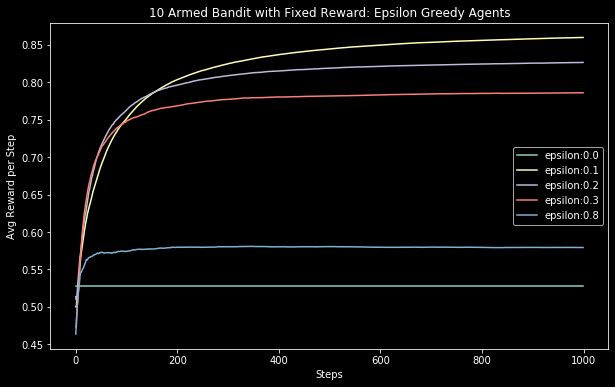

In [4]:
ten_armed_fixed_env = {
    "eps_greedy_agent": []
}

# experiment on ten_armed_fixed_env
for epsilon in epsilons:
    avg = run_experiment(TEN_ARMED_FIXED, EpsilonGreedyAgent, epsilon)
    ten_armed_fixed_env["eps_greedy_agent"].append(avg)
averages = ten_armed_fixed_env["eps_greedy_agent"]
steps = list(range(num_steps))
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(steps, averages[0], label="epsilon:"+str(epsilons[0]))
ax.plot(steps, averages[1], label="epsilon:"+str(epsilons[1]))
ax.plot(steps, averages[2], label="epsilon:"+str(epsilons[2]))
ax.plot(steps, averages[3], label="epsilon:"+str(epsilons[3]))
ax.plot(steps, averages[4], label="epsilon:"+str(epsilons[4]))
ax.grid(False)
ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward per Step')  # Add a y-label to the axes.
ax.set_title("10 Armed Bandit with Fixed Reward: Epsilon Greedy Agents")  # Add a title to the axes.
ax.legend()  # Add a legend.

TenArmedBanditGaussian-v0 0.0 0.5784886620038734
TenArmedBanditGaussian-v0 0.1 0.8219133604143017
TenArmedBanditGaussian-v0 0.2 0.8026843008210294
TenArmedBanditGaussian-v0 0.3 0.7621694477167609
TenArmedBanditGaussian-v0 0.8 0.5846079934696717


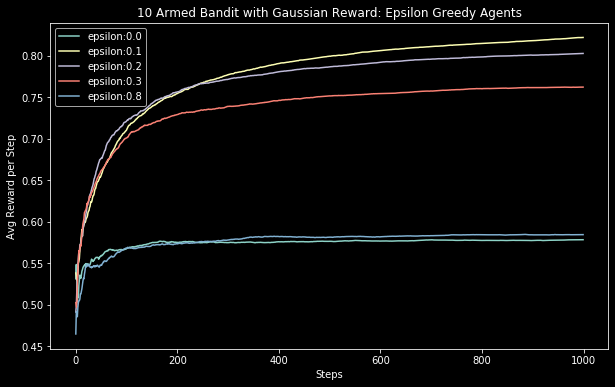

In [5]:
ten_armed_gaussian_env = {
    "eps_greedy_agent": [],
    "ucb_agent": []
}

# experiment on ten_armed_gaussian_env with eps greedy
for epsilon in epsilons:
    avg = run_experiment(TEN_ARMED_GAUSSIAN, EpsilonGreedyAgent, epsilon)
    ten_armed_gaussian_env["eps_greedy_agent"].append(avg)
averages = ten_armed_gaussian_env["eps_greedy_agent"]
steps = list(range(num_steps))
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(steps, averages[0], label="epsilon:"+str(epsilons[0]))
ax.plot(steps, averages[1], label="epsilon:"+str(epsilons[1]))
ax.plot(steps, averages[2], label="epsilon:"+str(epsilons[2]))
ax.plot(steps, averages[3], label="epsilon:"+str(epsilons[3]))
ax.plot(steps, averages[4], label="epsilon:"+str(epsilons[4]))
ax.grid(False)
ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward per Step')  # Add a y-label to the axes.
ax.set_title("10 Armed Bandit with Gaussian Reward: Epsilon Greedy Agents")  # Add a title to the axes.
ax.legend()  # Add a legend.

TenArmedBanditGaussian-v0 1 0.8226147219529484
TenArmedBanditGaussian-v0 2 0.7256187226690374
TenArmedBanditGaussian-v0 3 0.6682468945690446


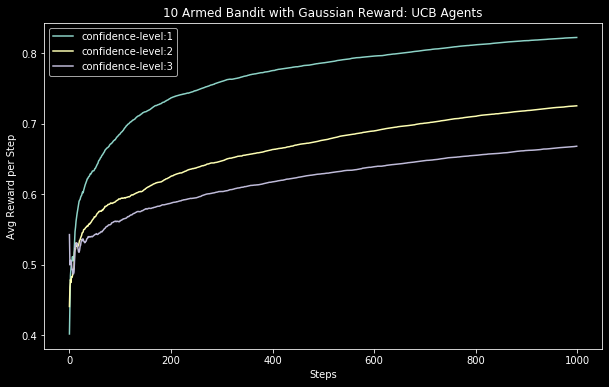

In [6]:
ten_armed_gaussian_env["ucb_agent"] = []
for confidence_level in confidence_levels:
    avg = run_experiment(TEN_ARMED_GAUSSIAN, UCBAgent, confidence_level)
    ten_armed_gaussian_env["ucb_agent"].append(avg)
averages = ten_armed_gaussian_env["ucb_agent"]
steps = list(range(num_steps))
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(steps, averages[0], label="confidence-level:" + str(confidence_levels[0]))
ax.plot(steps, averages[1], label="confidence-level:" + str(confidence_levels[1]))
ax.plot(steps, averages[2], label="confidence-level:" + str(confidence_levels[2]))
ax.grid(False)
ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward per Step')  # Add a y-label to the axes.
ax.set_title("10 Armed Bandit with Gaussian Reward: UCB Agents")  # Add a title to the axes.
ax.legend()  # Add a legend.